# Data 
https://drive.google.com/file/d/1bXotNR-Rwvlim89LZkii62wS4HKm2ceX/view?usp=sharing

The provided data is a sample of 982,619 reviews from the Amazon Kindle store.

Columns:
* `reviewerID` - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* `asin` - ID of the product, e.g. 0000013714
* `reviewerName` - name of the reviewer
* `helpful` - helpfulness rating of the review, e.g. 2/3
* `reviewText` - text of the review
* `overall` - rating of the product
* `summary` - summary of the review
* `unixReviewTime` - time of the review (unix time)
* `reviewTime` - time of the review (raw)

# **Exploring Customer Sentiments on Amazon Kindle Reviews: DataAnalysis**


**Aim of the project**  :  The project aims is to leverage data science techniques and analyse the Amazon Kindle reviews data using a machine learning model to gain a deeper understanding of customer feedback and product performance in the Amazon Kindle store. Will conduct sentiment analysis on customer reviews to categorize them as positive, neutral, or negative based on their overall ratings and textual content.Preprocess review text data by cleaning, lemmatizing, and removing stopwords to prepare it for analysis.Analyze the most frequently reviewed products and examine reviewer behavior also create word cloud visualizations to highlight frequently occurring words in reviews.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string 
from wordcloud import WordCloud

## First: Loading the CSV Data

Reading and Displaying Data from a CSV File.
This code reads data from a CSV file located at the specified path and displays the first 10 records of the DataFrame.

In [2]:
df = pd.read_csv(r"C:\Ambili\DSTextAnalysis\reviewdata.csv")

In [3]:
df.head(10) 

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,"[0, 0]",I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,"05 5, 2014"
1,AN0N05A9LIJEQ,B000F83SZQ,critters,"[2, 2]",This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,"01 6, 2014"
2,A795DMNCJILA6,B000F83SZQ,dot,"[2, 2]",This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,"04 4, 2014"
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""","[1, 1]",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,"02 19, 2014"
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"[0, 1]","If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,"03 19, 2014"
5,A1RK2OCZDSGC6R,B000F83SZQ,ubavka seirovska,"[0, 0]",A beautiful in-depth character description mak...,4.0,Review,1401062400,"05 26, 2014"
6,A2HSAKHC3IBRE6,B000F83SZQ,Wolfmist,"[0, 0]",I enjoyed this one tho I'm not sure why it's c...,4.0,Nice old fashioned story,1402358400,"06 10, 2014"
7,A3DE6XGZ2EPADS,B000F83SZQ,WPY,"[1, 1]",Never heard of Amy Brewster. But I don't need ...,4.0,Enjoyable reading and reminding the old times,1395446400,"03 22, 2014"
8,A1UG4Q4D3OAH3A,B000FA64PA,dsa,"[0, 0]",Darth Maul working under cloak of darkness com...,5.0,Darth Maul,1381449600,"10 11, 2013"
9,AQZH7YTWQPOBE,B000FA64PA,Enjolras,"[0, 0]",This is a short story focused on Darth Maul's ...,4.0,"Not bad, not exceptional",1297555200,"02 13, 2011"


## Pre-processing the Text


Data Quality Check and Handling Null Values
This code performs data quality checks by checking for null values in specific columns
of the DataFrame and provides information about the shape of the DataFrame.
In 'columns_to_check' list is to specify only those columns which I felt was mandatory fields and thus cheked for the null values.

I have selected only the reviewerID and asin , since thier combination needs to be unique and primary.



In [4]:
print(df.shape)
print(df.isnull().values.any())

(982619, 9)
True



Output of the above code is displayed, showing the shape of the DataFrame and null value information.

In [5]:
columns_to_check = ['reviewerID', 'asin']
rows_with_null = df[df[columns_to_check].isnull().any(axis=1)]
print(rows_with_null)

Empty DataFrame
Columns: [reviewerID, asin, reviewerName, helpful, reviewText, overall, summary, unixReviewTime, reviewTime]
Index: []



Finding and Handling Duplicate Records

This code snippet identifies and handles duplicate records in a DataFrame based on specific columns.
'subset' parameter to specify the columns that define a duplicate record. The 'keep' parameter allows you to choose whether to keep the first occurrence or remove all duplicates.
Output:The code prints a DataFrame containing duplicate records based on the specified criteria.
 


In [6]:
duplicates = df[df.duplicated(subset=['asin','reviewerName', 'reviewText'], keep= False)]
print(duplicates)# Since its only 4 records and the reviewTime is also distinct in the duplicates ,we are not removing the records 


            reviewerID        asin    reviewerName helpful  \
122396  A3OKIX60LAA5Z0  B005V0XEO8  Angelscryhavoc  [6, 6]   
122397  A30VDBGDXQ69XQ  B005V0XEO8  Angelscryhavoc  [6, 7]   
904482  A29R736QTYC5BS  B00JTJ2F2O  Stacey O'Neale  [0, 0]   
904483  A34T586GFNWUZX  B00JTJ2F2O  Stacey O'Neale  [1, 1]   

                                               reviewText  overall  \
122396  Book Title: Ghost of a ChanceAuthor: Deena Rem...      5.0   
122397  Book Title: Ghost of a ChanceAuthor: Deena Rem...      5.0   
904482  I feel like I waited a 100 years for this book...      4.0   
904483  I feel like I waited a 100 years for this book...      4.0   

                            summary  unixReviewTime   reviewTime  
122396            Filling backstory      1335139200  04 23, 2012  
122397  Can the two save each other      1324166400  12 18, 2011  
904482  Another Goodie from J. Lynn      1403481600  06 23, 2014  
904483             Classic J. Lynn!      1401062400  05 26, 2014  



## Visualizing Overall Product Ratings

This code snippet generates a count plot to visualize the distribution of product ratings (overall rating) in the dataset.
Annotations are added to display the count of each rating category. This visualization helps assess the balance of ratings in the dataset.



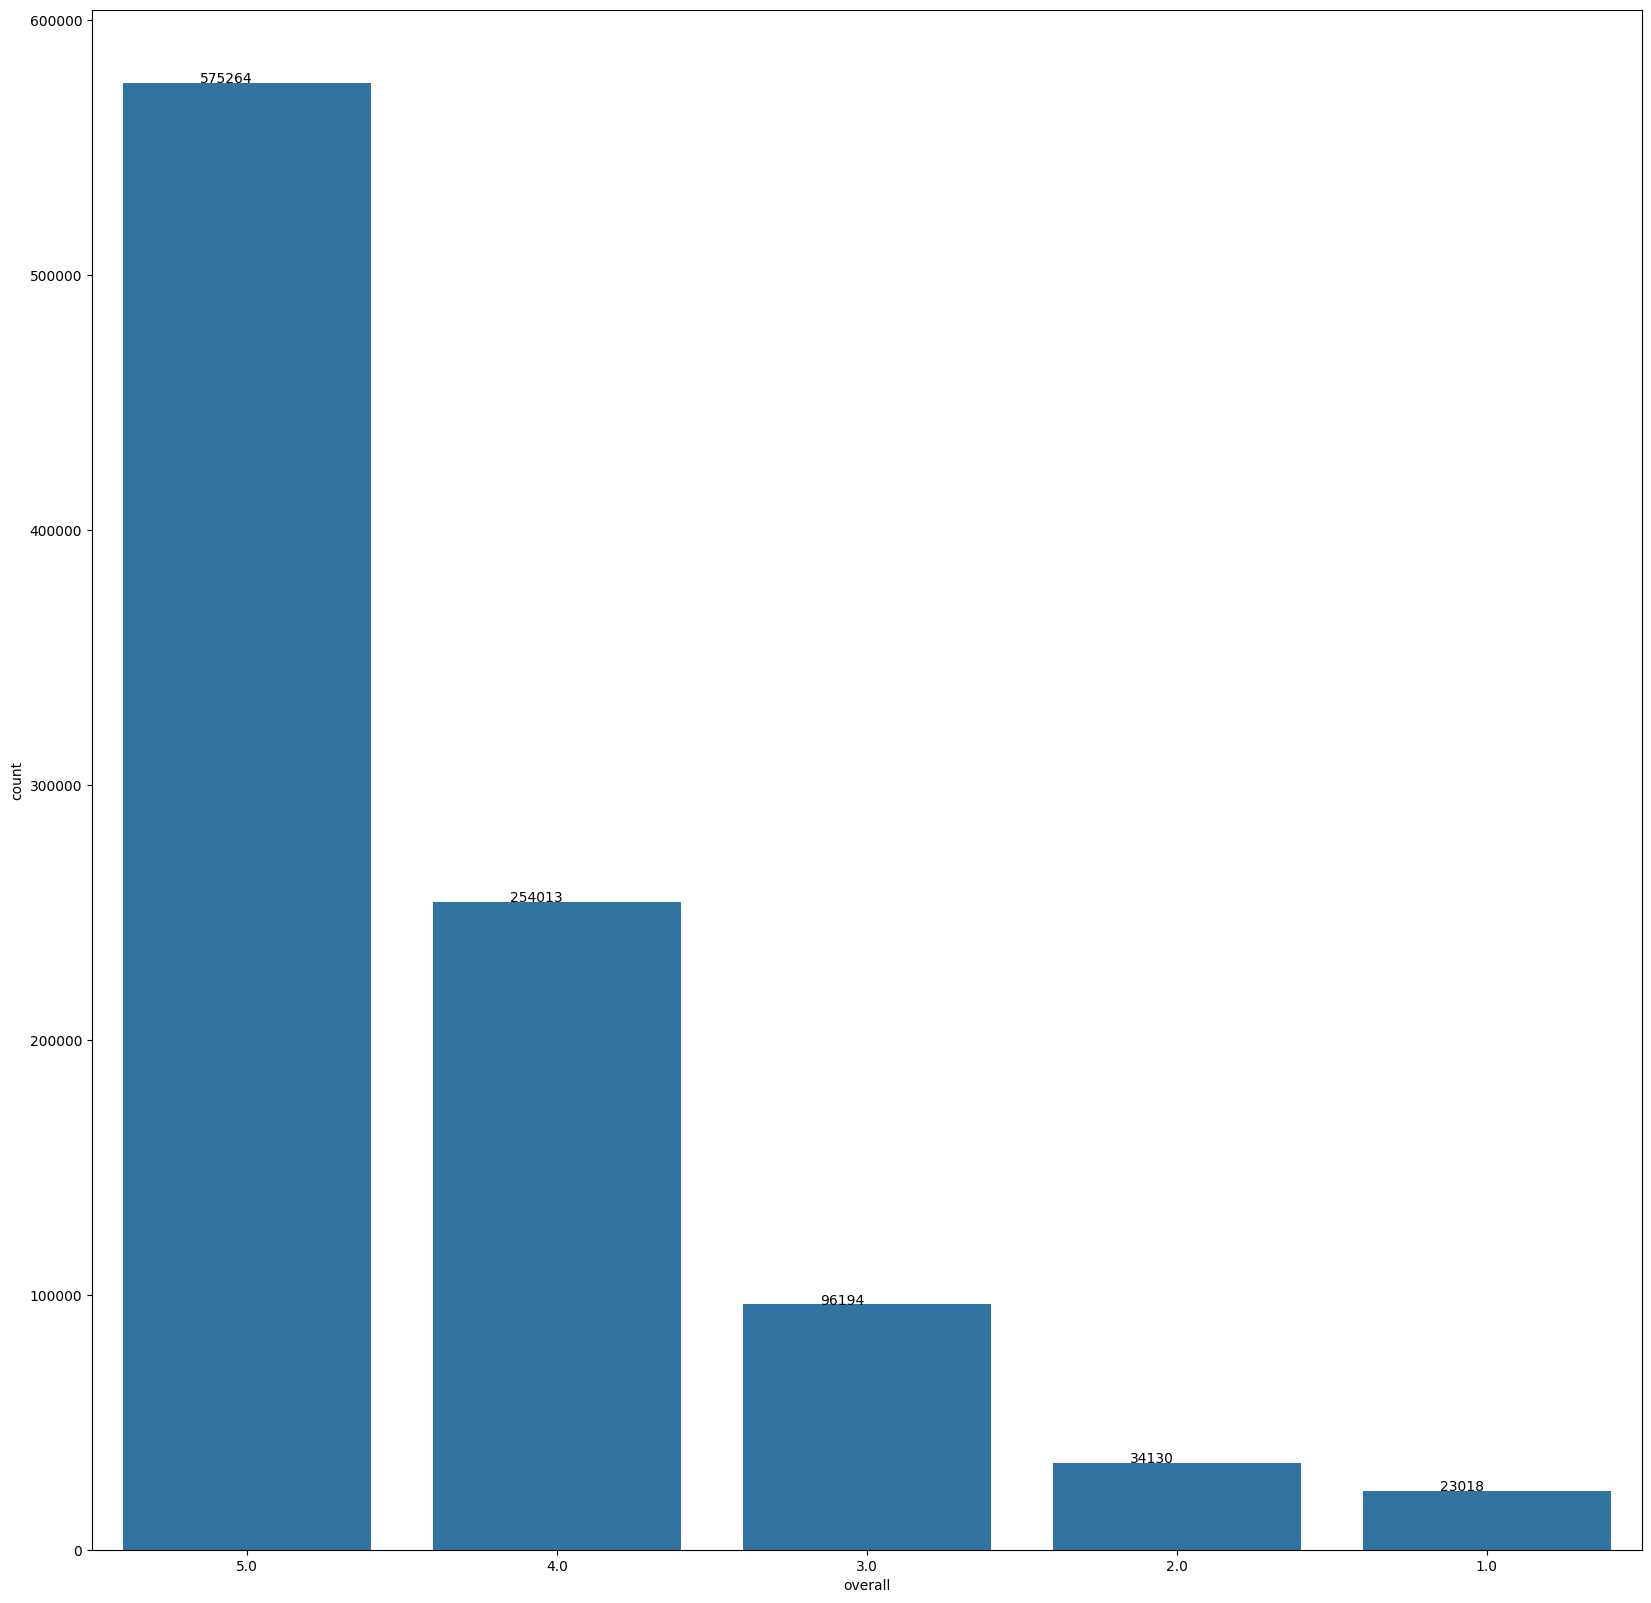

In [7]:
# Plot according to the overall score
plt.figure(figsize=(20,20))
ax = sns.countplot(x=df["overall"], data=df, order=df["overall"].value_counts().index)
for p, label in zip(ax.patches, df["overall"].value_counts()):
    ax.annotate(label, (p.get_x() + 0.25, p.get_height() + 0.5))
#Below figure shows that half of the record is having a overall score of 5. So this shows that the dataset is highly imbalanced.

In the plot we can see that the viewers have mostly give rating 5.So generally it can be understood that majority have given a good rating for the books.

This part of the code initiates the grouping operation. It tells to group the data in the DataFrame based on the unique values found in the 'asin' which is the book code or the product code column.

In [8]:
df.groupby('asin').count() 

,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
asin,,,,,,,,
B000F83SZQ,8,8,8,8,8,8,8,8
B000FA64PA,5,5,5,5,5,5,5,5
B000FA64PK,8,8,8,8,8,8,8,8
B000FA64QO,5,5,5,5,5,5,5,5
B000FBFMVG,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...
B00LZFHL7Y,16,16,16,16,16,16,16,16
B00LZKMXBI,75,75,75,75,75,75,75,75
B00M029T4O,11,11,11,11,11,11,11,11


This code snippet filters the original DataFrame df to retain only those products ('asin') that have at least 200 reviews. It then groups the filtered data by 'asin' to create a new DataFrame, df_asin_grps, that contains these products with sufficient review data. This filtering and grouping are often done to focus on products with a substantial number of reviews for further analysis.




In [9]:
df_asin = df.groupby('asin').filter(lambda x: len(x)>= 200) 
df_asin_grps=df_asin.groupby('asin')

In [10]:
print(len(df_asin))
print(len(df_asin_grps))
df_asin.head() # 

29083
102


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
13357,A2K7H6OEXM8NJV,B0038KX8S0,"Aloveras ""Alo""","[0, 2]","although some parts were a bit stereotypical, ...",5.0,great read,1357776000,"01 10, 2013"
13358,AYIK5NCTX48XO,B0038KX8S0,amanda king,"[0, 0]",I liked it. The guy in this story makes me mad...,4.0,But it turned out to be the right one!!,1387152000,"12 16, 2013"
13359,AMU0GT3TJ2K78,B0038KX8S0,"Amazon Customer ""Childcare Whiz""","[0, 0]","This was a waste. Poorly written,like a story ...",1.0,Unbelievable and poorly timed,1368489600,"05 14, 2013"
13360,A3Z672XIKLODE,B0038KX8S0,Amazon Customer,"[0, 0]",I downloaded this book thinking it would be an...,5.0,EXCELLENT!!!!,1384041600,"11 10, 2013"
13361,A1L9EVLKRETFPQ,B0038KX8S0,Amazon Customer,"[0, 0]",If you are wanting hardcore this is not the bo...,4.0,Good story and lenght,1368489600,"05 14, 2013"


This code performs data aggregation by grouping 'asin' and 'overall,' counting the occurrences for each combination, and then visualizing the results as a stacked bar plot. The plot provides insights into the distribution of review ratings ('overall') for each product ('asin')

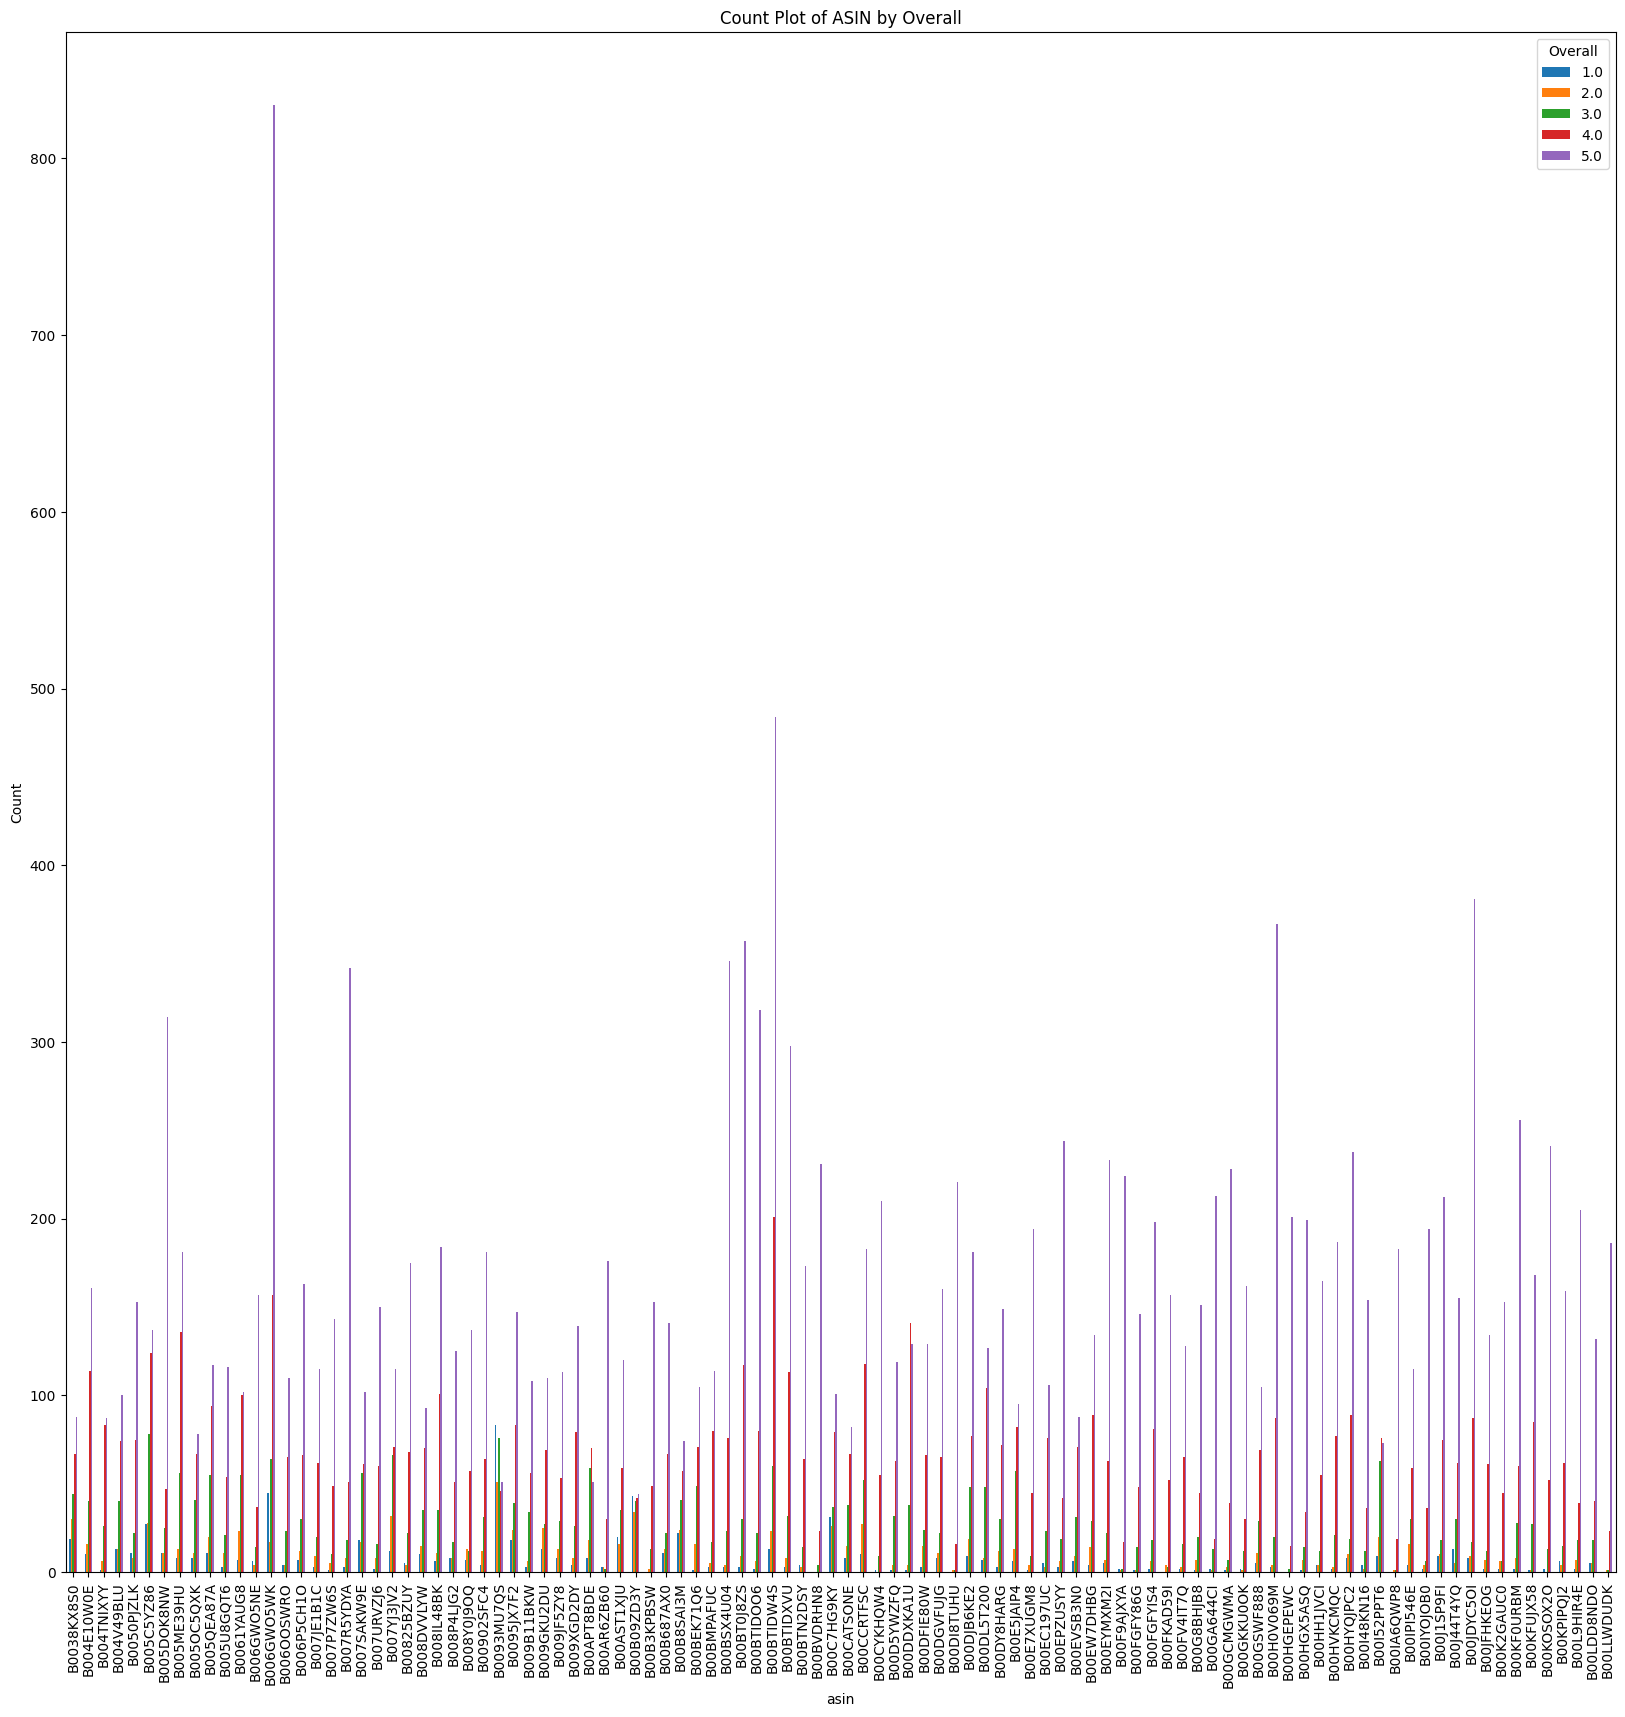

In [11]:
counts = df_asin.groupby(['asin', 'overall']).size().unstack(fill_value=0)
counts.plot(kind='bar', stacked=False, figsize=(20, 20))
plt.ylabel('Count')
plt.xlabel('asin')
plt.title('Count Plot of ASIN by Overall')
plt.legend(title='Overall', loc='upper right')
plt.show()

This code groups the data by the 'reviewerID' column, counts the occurrences for each reviewer, and then prints the total number of unique reviewers in the dataset, which is 68,223 in this case.

In [12]:
df.groupby('reviewerID').count() # So altogether there are 68223 reviewers.

,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
reviewerID,,,,,,,,
A00085083TSCV82430YT4,6,6,6,6,6,6,6,6
A0010876CNE3ILIM9HV0,6,6,6,6,6,6,6,6
A00207583M69Q8KX3BOFQ,6,6,6,6,6,6,6,6
A002359833QJM7OQHCXWY,14,14,14,14,14,14,14,14
A00328401T70RFN4P1IT6,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...
AZZMO52V8WZ68,36,36,36,36,36,36,36,36
AZZN6N74U2PA5,37,37,37,37,37,37,37,37
AZZPTYC0F6FWA,18,18,18,18,18,18,18,18


In [15]:
#Some reviewers would have given more than 1 review, so here we are getting a count of the users who would have made review more than 100 times.
df_rewiers = df.groupby('reviewerID').filter(lambda x: len(x) >=100)
df_grp = df_rewiers.groupby('reviewerID')
print(len(df_grp))

829


In [16]:
#we are getting a count of the users who would have made review more than 150 times.
df_rewiers = df.groupby('reviewerID').filter(lambda x: len(x) >=150)
df_grp = df_rewiers.groupby('reviewerID')
print(len(df_grp))

359


In [17]:
#we are getting a count of the users who would have made review more than 200 times.
df_rewiers = df.groupby('reviewerID').filter(lambda x: len(x) >=200)
df_grp = df_rewiers.groupby('reviewerID')
print(len(df_grp))

200


This code filters the dataset to include only reviewers who have made more than 350 reviews, then counts the number of unique reviewers and products in this filtered dataset. In this case, there are 42 such reviewers and 14,460 unique products reviewed by them.







In [18]:
#we are getting a count of the users who would have made review more than 350 times.
df_rewiers = df.groupby('reviewerID').filter(lambda x: len(x) >=350)
df_grp = df_rewiers.groupby('reviewerID')
print("Number of reviewers :" +str(len(df_grp)))
df_pdts =df_rewiers.groupby('asin')
print("Number of products :" +str(len(df_pdts)))


Number of reviewers :42
Number of products :14460


## Text mining using NLTK

This code snippet imports and sets up the Natural Language Toolkit (NLTK) for text processing. It specifically imports functions for tokenization, lemmatization, and stopwords removal. Additionally, it downloads the WordNet dataset.Using NLTK we Tokenize the reviewText We could manually strip those out and do other formatting of the text. Luckily, NLTK has built-in methods to do a lot of this stuff for us. We can start by "tokenizing" the text.

In [20]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ambil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Preprocessing 

### remove_stopwords

This function, remove_stopwords, is designed to preprocess text data by removing common English stopwords. Stopwords are words that do not carry significant meaning and are often removed to reduce noise in text data. It tokenizes the input text, converts it to lowercase, and then filters out any stopwords.                                                                                                                                             Args:  text (str): The input text to process Returns: str or none.
Clean and preprocess text data by eliminating stopwords, making it more suitable for natural language processing tasks. It takes an input text, removes stopwords, and returns the processed text. If an error occurs during execution, it catches the exception, prints an error message, and returns None.

In [21]:
def remove_stopwords(text):
    try:
        if isinstance(text, str):
            stop_words = set(stopwords.words('english'))
            words = word_tokenize(text.lower())
            sentence = [w for w in words if not w in stop_words]
            return " ".join(sentence)
        else:
            return str(text)
    except Exception as e:
        print(f"An error occurred in remove_stopwords: {str(e)}")
        return None  # Return None or handle the error as needed


### lemmatize_text

This function is used for text preprocessing and aims to lemmatize words in a given text.
Lemmatization is the process of reducing words to their base or dictionary form. For example,"better" becomes "good."
It takes an input text and performs lemmatization on the words within the text.
The NLTK library is used to tokenize sentences and words and apply lemmatization to each word.
The resulting lemmatized words are then joined together to form a single string of text.
The lemmatized text is returned as the output.

In [22]:
def lemmatize_text(text):
        wordlist = []
        lemmatizer = WordNetLemmatizer()
        sentences = sent_tokenize(text)
        for sentence in sentences:
            words = word_tokenize(sentence)
            for word in words:
                wordlist.append(lemmatizer.lemmatize(word))
        return ' '.join(wordlist)
     


### clean_text

This function is used for text preprocessing and aims to clean and standardize the format of a given text.
It takes an input text and performs several cleaning operations on it.
The function first checks if the input is a valid string (text).
It removes punctuation marks and replaces them with spaces, ensuring that words are separated properly.
Extra spaces between words are removed, and the text is converted to lowercase for consistency.
The cleaned and preprocessed text is returned as the output.

In [23]:
def clean_text(text):
    try:
        if isinstance(text, str):
            delete_dict = {sp_char: '' for sp_char in string.punctuation}
            delete_dict[' '] = ' '
            table = str.maketrans(delete_dict)
            text1 = text.translate(table)
            textArr = text1.split()
            text2 = ' '.join([w for w in textArr])
            return text2.lower()
        else:
            return str(text)
    except Exception as e:
        print(f"An error occurred in clean_text: {str(e)}")
        return None  # Return None or handle the error as needed


df_rating12 will contain reviews with an "overall" rating of 1 or 2, indicating low ratings.
df_rating345 will contain reviews with an "overall" rating of 3, 4, or 5, indicating moderate to high ratings.
The code uses Boolean masks to create these subsets by checking the "overall" column values.

In [24]:
df.loc[:, 'reviewText'] = df['reviewText'].apply(clean_text)

In [25]:
df.loc[:, 'reviewText'] = df['reviewText'].apply(remove_stopwords)

In [26]:
df.loc[:, 'reviewText'] = df['reviewText'].apply(lemmatize_text)

In [27]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK's Vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ambil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
sid = SentimentIntensityAnalyzer()
def calculate_polarity(review):
    polarity_score = sid.polarity_scores(review)['compound']
    return polarity_score

In [30]:
df['Polarity Score'] = df['reviewText'].apply(calculate_polarity)

In [42]:
def feel(polarityscore):
    if polarityscore >= 0.04 :
        str_feel = "Positive"
    elif polarityscore <= -0.04:
        str_feel = "Negative"
    else:
        str_feel = "Neutral"
    return str_feel   

In [43]:
df["feel"] = df['Polarity Score'].apply(feel)

feel
Positive    880985
Negative     86109
Neutral      15525
Name: count, dtype: int64


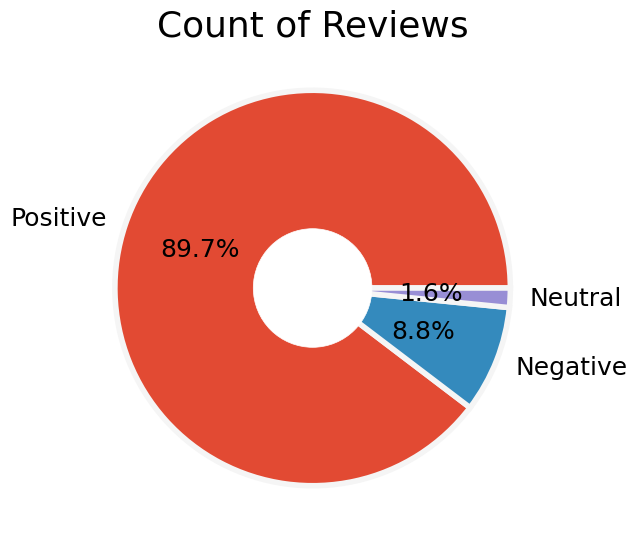

In [53]:
print(df.feel.value_counts())

plt.style.use('ggplot')
plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(figsize=(5,6))

ax.pie(list(df.feel.value_counts()), 
       labels=df.feel.value_counts().index, 
       autopct='%1.1f%%',
       wedgeprops = { 'linewidth': 4, 'edgecolor': 'whitesmoke' })

circle = plt.Circle((0,0), 0.3, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

ax.set_title('Count of Reviews')
ax.axis('equal')
plt.show()

In this analysis, we delve into the sentiment expressed in book reviews, categorizing them into positive, negative, and neutral sentiments. Using a donut chart visualization, we aim to gain insights into the distribution of sentiments among reviewers. The analysis of book reviews revealed that the majority of sentiments expressed are positive, comprising 89.7% of the total reviews. This indicates a high level of satisfaction and appreciation among readers for the literary works they encounter. Conversely, negative sentiments accounted for 8.8% of the reviews, suggesting areas for improvement or aspects that may have fallen short of expectations. Neutral sentiments constituted a smaller proportion, making up only 1.6% of the reviews.

In [99]:
# Create mask for overall ratings 1 and 2
mask12 = (df["overall"] == 1) | (df["overall"] == 2)
df_rating12 = df[mask12]

# Create mask for overall ratings 3, 4, and 5
mask345 = (df["overall"] == 3) | (df["overall"] == 4) | (df["overall"] == 5)
df_rating345 = df[mask345]

# Print the lengths of the two dataframes
print(len(df_rating12))
print(len(df_rating345))



57148
925471


This code snippet is performing text preprocessing on the "reviewText" column of two DataFrames: df_rating12 and df_rating345. Text preprocessing is a common step in natural language processing (NLP) tasks and is used to clean and prepare text data for analysis or modeling.After running this code, the "reviewText" column in both DataFrames will contain preprocessed text data, ready for further analysis or modeling tasks. This preprocessing can improve the quality of the text data and enhance the performance of NLP models.

In [100]:
df_rating12.loc[:, 'reviewText'] = df_rating12['reviewText'].apply(clean_text)

In [101]:
df_rating12.loc[:, 'reviewText'] = df_rating12['reviewText'].apply(remove_stopwords)

In [102]:
df_rating12.loc[:, 'reviewText'] = df_rating12['reviewText'].apply(lemmatize_text)

In [103]:
df_rating345.loc[:, 'reviewText'] = df_rating345['reviewText'].apply(clean_text)

In [104]:
df_rating345.loc[:, 'reviewText'] = df_rating345['reviewText'].apply(remove_stopwords)

In [105]:
df_rating345.loc[:, 'reviewText'] = df_rating345['reviewText'].apply(lemmatize_text)

This code snippet calculates the number of words in the "reviewText" column of two DataFrames: df_rating12 and df_rating345.
The lambda function lambda x: len(str(x).split()) is applied to each row of the "reviewText" column to perform the word count.After running this code, both DataFrames will have a new column that stores the count of words in each review text. This information can be useful for text analysis and understanding the length of reviews in the dataset.

In [107]:
df_rating12['Num_words_text'] = df_rating12['reviewText'].apply(lambda x: len(str(x).split()))
df_rating345['Num_words_text'] = df_rating345['reviewText'].apply(lambda x: len(str(x).split()))

C:\Users\ambil\AppData\Local\Temp\ipykernel_14760\2677840713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating12['Num_words_text'] = df_rating12['reviewText'].apply(lambda x: len(str(x).split()))
C:\Users\ambil\AppData\Local\Temp\ipykernel_14760\2677840713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating345['Num_words_text'] = df_rating345['reviewText'].apply(lambda x: len(str(x).split()))


These two lines of code generate descriptive statistics for the "Num_words_text" column in two DataFrames: df_rating12 and df_rating345.
The .describe() function is applied to the "Num_words_text" column, providing summary statistics for that column.Descriptive statistics are helpful for understanding the distribution and characteristics of the word count in the review text. This information can provide insights into the length of reviews in each DataFrame.

In [108]:
df_rating12['Num_words_text'].describe()

count    57148.000000
mean        51.111797
std         65.322053
min          0.000000
25%         15.000000
50%         29.000000
75%         59.000000
max       1644.000000
Name: Num_words_text, dtype: float64

In [109]:
df_rating345['Num_words_text'].describe() 

count    925471.000000
mean         55.293425
std          65.279071
min           0.000000
25%          17.000000
50%          31.000000
75%          65.000000
max        2029.000000
Name: Num_words_text, dtype: float64

In [72]:
# The above result shows that for a rating 3,4,5 the number of words are definetly more which can be concluded from mean and max values.

## Word Cloud

WordClouds are a visual representation of text data where the size of each word is proportional to its frequency in the text.
In this code, we focus on the "summary" text data from the df_rating12 DataFrame.
By converting the "summary" column to strings, we ensure that the WordCloud treats the data as text.
The WordCloud is generated with a white background, and the resulting visualization displays the most frequently occurring words from the "summary" column.The comments provide insights into the interpretation of the WordCloud, suggesting that low-rated products tend to have negative words like "waste," "time," "boring," and "disappointing" appearing more frequently in their summaries.

C:\Users\ambil\AppData\Local\Temp\ipykernel_14760\4102963866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating12['summary'] = df_rating12['summary'].astype(str)


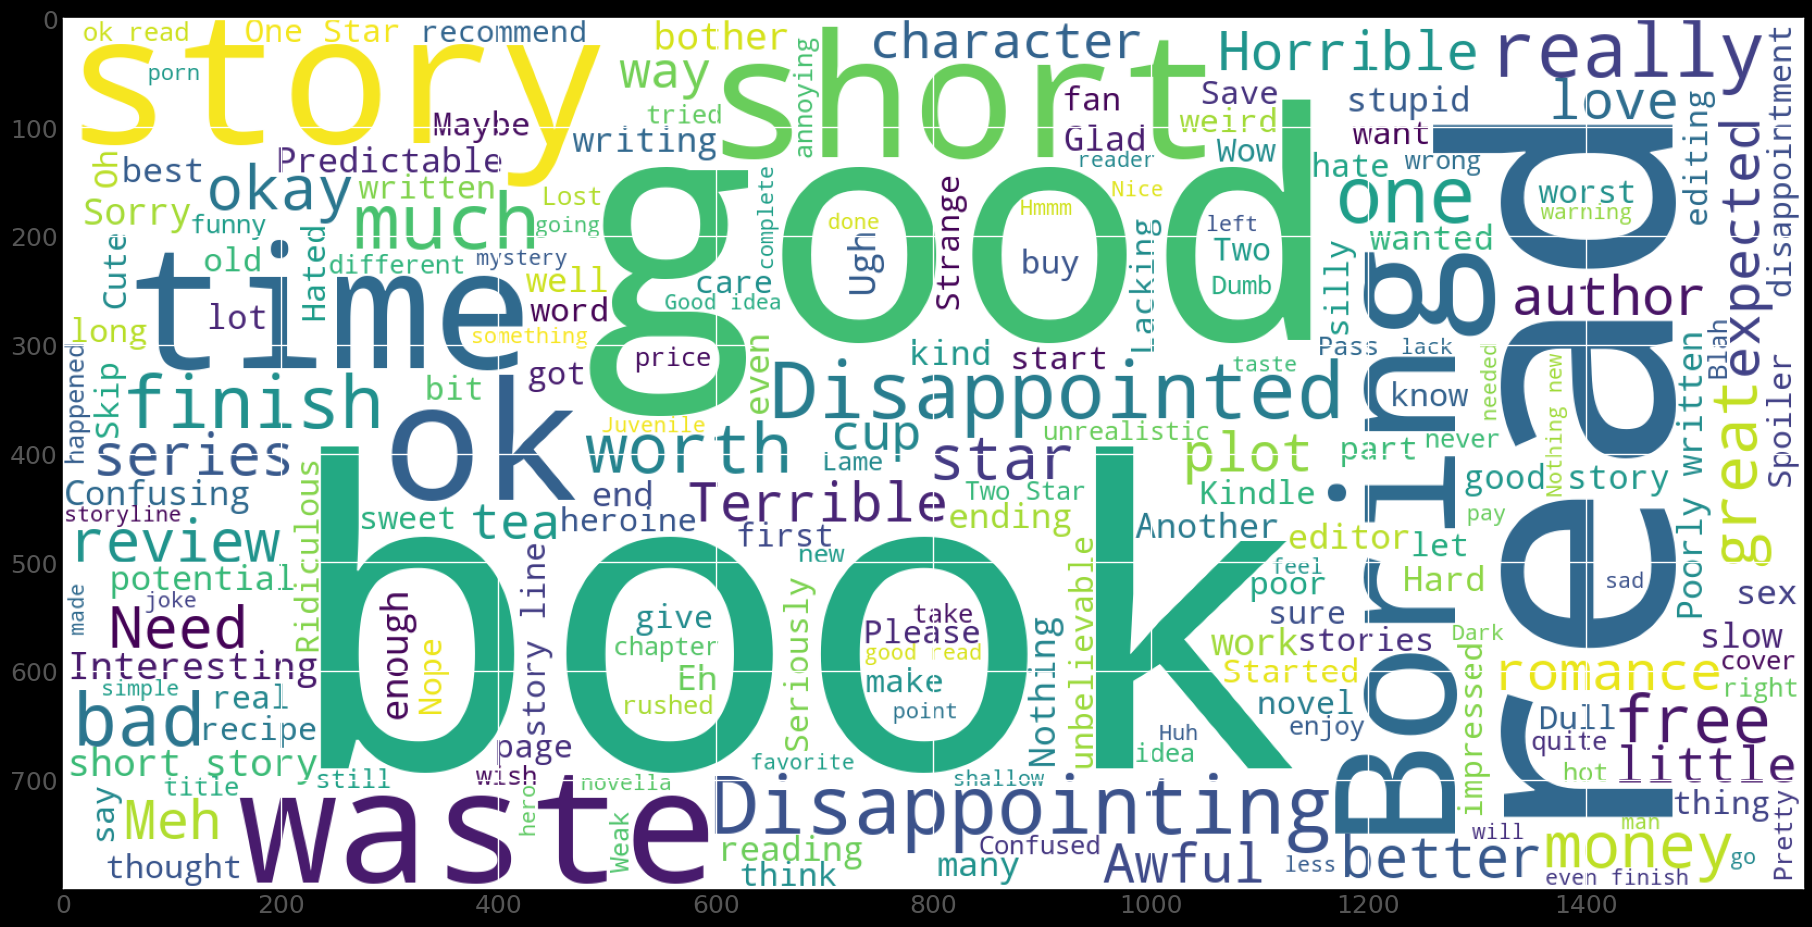

In [110]:
df_rating12['summary'] = df_rating12['summary'].astype(str)
wordcloud = WordCloud(background_color = "white",width=1600, height = 800).generate(' '.join(df_rating12['summary'].tolist()))
plt.figure( figsize=(20,20),facecolor = 'k')
plt.imshow(wordcloud) # As we can see in the low rating has most negative words and the words that are more frequent in the list are big and bold.
# We can infere that the low rated products have frequent word such as waste , time , boring , disappointing. 

This code is similar to the previous one but focuses on the df_rating345 DataFrame, which likely contains higher-rated products.
The WordCloud is generated with a white background, and the resulting visualization displays the most frequently occurring words from the "summary" column.
The comments provide insights into the interpretation of the WordCloud, suggesting that higher-rated products tend to have positive words like "love," "loved," "sweet," and "great book" appearing more frequently in their summaries. These positive words are displayed prominently in the WordCloud visualization.

C:\Users\ambil\AppData\Local\Temp\ipykernel_14760\1345144213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating345['summary'] = df_rating345['summary'].astype(str)


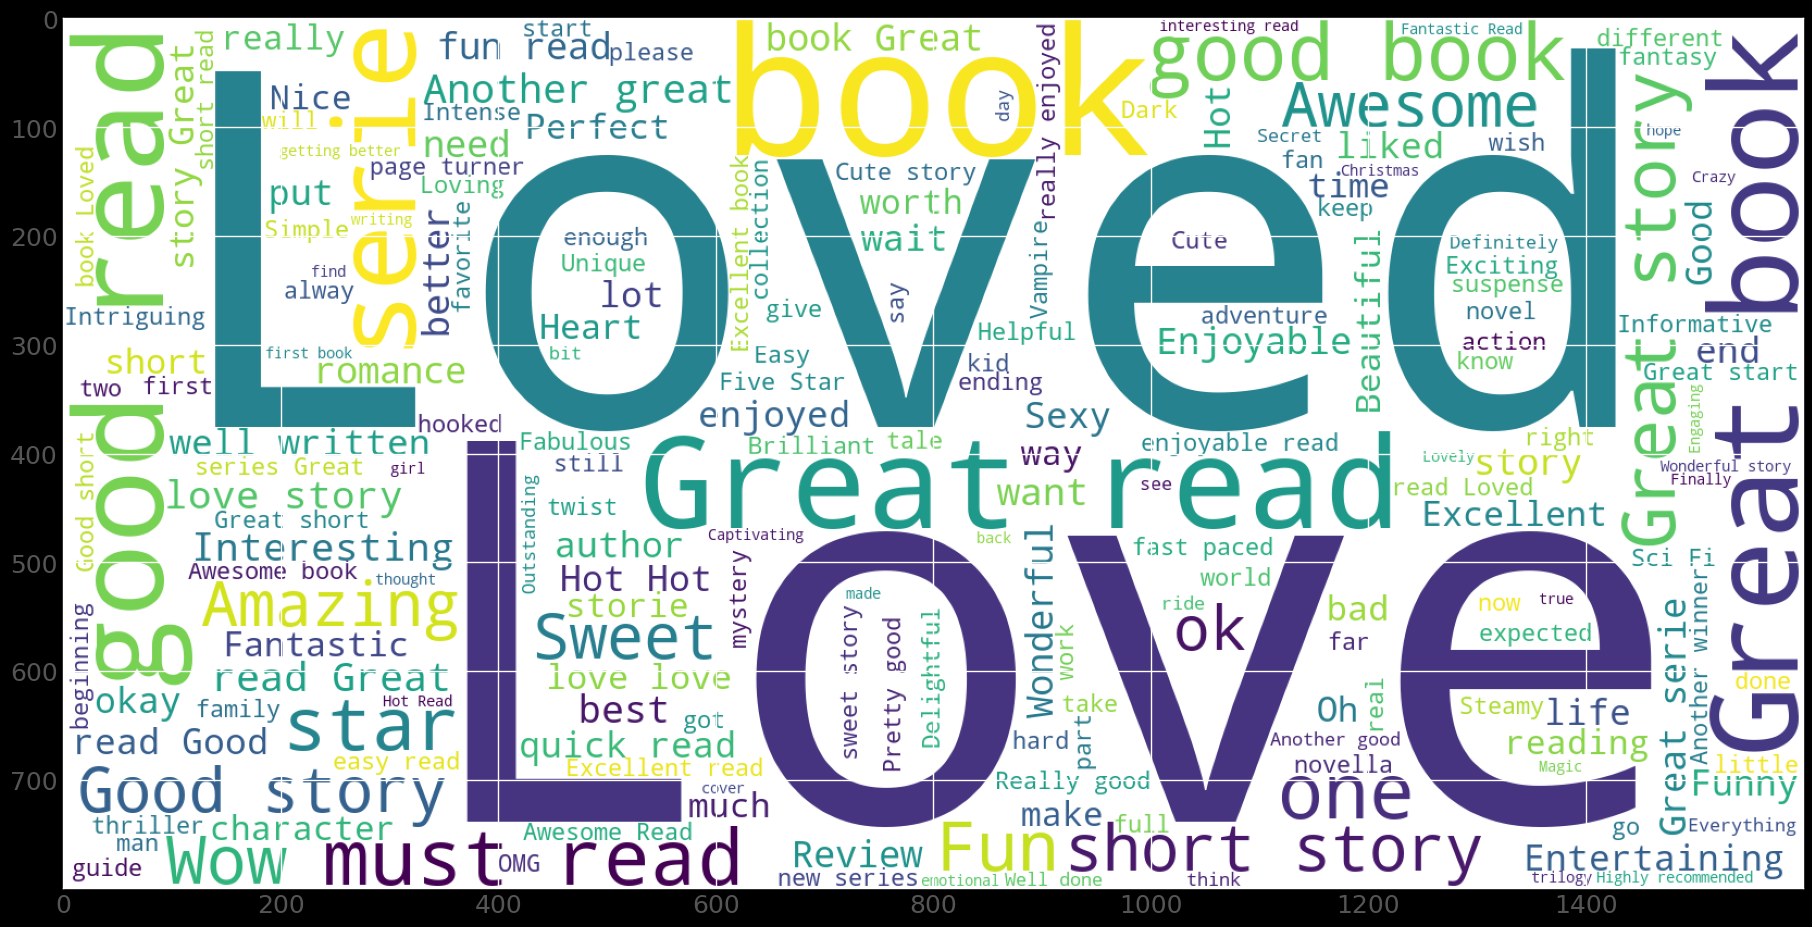

In [111]:
df_rating345['summary'] = df_rating345['summary'].astype(str)
wordcloud1 = WordCloud(background_color = "white",width=1600, height = 800).generate(' '.join(df_rating345['summary'].tolist()))
plt.figure( figsize=(20,20),facecolor = 'k')
plt.imshow(wordcloud1) # It can be seen that its all postive words like love, loved, sweet,great book for the higher overall score.

## Analyzing Highest Reviewed ASIN

In [78]:
product_review_counts = df.groupby('asin')['reviewerID'].count().reset_index()
product_review_counts.columns = ['asin', 'review_count']
product_review_counts= product_review_counts[product_review_counts['review_count'] > 200].sort_values(by='review_count', ascending=False)
overall_rating_counts = df.groupby(['asin', 'overall']).size().unstack(fill_value=0).reset_index()
final_df = pd.merge(product_review_counts, overall_rating_counts, on='asin')

The DataFrame df is initially grouped by the 'asin'.For each 'asin', the number of reviews is counted using the 'reviewerID' column.After obtaining the review counts for each product, the code filters out products that have more than 200 reviews. The filtered DataFrame product_review_counts is then sorted in descending order based on the 'review_count' column. Another DataFrame, overall_rating_counts, is created by grouping the original DataFrame (df) by both 'asin' and 'overall' columns. The size() function is used to count the number of occurrences of each rating within each product group. The unstack() function is then applied to pivot the data, resulting in a DataFrame where each rating category (1.0, 2.0, 3.0, 4.0, 5.0) becomes a separate column. Any missing values are filled with 0.Finally, the filtered product_review_counts DataFrame and the pivoted overall_rating_counts DataFrame are merged on the 'asin' column using the pd.merge() function. 

In [59]:
pd.set_option('display.max_rows', None)

In [97]:
final_df

,asin,review_count,1.0,2.0,3.0,4.0,5.0
0,B006GWO5WK,1113,45,17,64,157,830
1,B00BTIDW4S,781,13,23,60,201,484
2,B00BT0J8ZS,516,3,9,30,117,357
3,B00JDYC5OI,502,8,9,17,87,381
4,B00H0V069M,481,3,4,20,87,367
5,B00BTIDXVU,454,3,8,32,113,298
6,B00BSX4U04,452,3,4,23,76,346
7,B00BTIDOO6,428,2,6,22,80,318
8,B007R5YDYA,422,3,8,18,51,342
9,B005DOK8NW,408,11,11,25,47,314


The ASIN with the highest review count is B006GWO5WK with a total of 1113 reviews.
The ASIN with the highest count of positive reviews (rating 5.0) is B006GWO5WK with 830 reviews rated as 5.0.
To identify the ASIN with relatively bad reviews, we can consider those with a low proportion of positive ratings compared to the total number of ratings. One way to gauge this is by looking at the proportion of ratings below 3.0. From the above data, B00CCRTFSC seems to have a relatively lower proportion of positive ratings compared to others, with 10 reviews rated 1.0, 27 reviews rated 2.0, and 52 reviews rated 3.0